# <h1>Analisis Faktor yang Mempengaruhi Kebahagiaan Masyarakat di setiap Negara di Dunia</h1>

<p>World Happiness Report adalah survei tengara dari kondisi kebahagiaan global. Laporan pertama diterbitkan pada 2012, yang kedua di 2013, yang ketiga di 2015, dan yang keempat di Pembaruan 2016. World Happiness 2017, yang berada di peringkat 155 negara berdasarkan tingkat kebahagiaannya, dirilis di PBB pada acara yang merayakan Hari Kebahagiaan Internasional pada 20 Maret. Laporan ini terus mendapatkan pengakuan global karena pemerintah, organisasi dan masyarakat sipil semakin menggunakan indikator kebahagiaan untuk menginformasikan keputusan pembuatan kebijakan mereka. Pakar terkemuka di berbagai bidang - ekonomi, psikologi, analisis survei, statistik nasional, kesehatan, kebijakan publik, dan lainnya - menggambarkan bagaimana pengukuran kesejahteraan dapat digunakan secara efektif untuk menilai kemajuan negara. Laporan tersebut meninjau keadaan kebahagiaan di dunia saat ini dan menunjukkan bagaimana ilmu kebahagiaan yang baru menjelaskan variasi kebahagiaan pribadi dan nasional.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import feature_selection, linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import cluster, mixture 
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.preprocessing import StandardScaler
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from scipy.optimize import curve_fit
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('/kaggle/input/world-happiness/2017.csv')
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


<h3>Memahami Variabel dalam Dataset</h3>
<p>Ekonomi PDB per Kapita (Economy..GDP.per.Capita.): Sejauh mana kontribusi PDB terhadap perhitungan Skor Kebahagiaan.</p>

<p>Keluarga (Family): Sejauh mana Keluarga berkontribusi dalam perhitungan Skor Kebahagiaan</p>

<p>Kesehatan,Harapan Hidup(Health..Life.Expectancy.): Sejauh mana Harapan Hidup berkontribusi pada perhitungan Skor Kebahagiaan.</p>

<p>Kebebasan(Freedom): Sejauh mana Kebebasan berkontribusi pada perhitungan Skor Kebahagiaan.</p>

<p>Kepercayaan,Korupsi Pemerintah(Trust..Government.Corruption.): Sejauh mana Persepsi Korupsi berkontribusi pada Skor Kebahagiaan.</p>

<p>Kedermawanan(Generosity): Sejauh mana Kedermawanan berkontribusi pada perhitungan Skor Kebahagiaan.</p>

<p>Dystopia Residual: Sejauh mana Dystopia Residual berkontribusi pada perhitungan Skor Kebahagiaan.</p>

In [3]:
print("Terdiri dari {:,} baris ".format(df.shape[0]) + "dan {} kolom dalam data".format(df.shape[1]))

Terdiri dari 155 baris dan 12 kolom dalam data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [5]:
df.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [6]:
## Menghapus kolom yang tidak terpakai/duplikat
df2 = df.drop(['Whisker.high','Whisker.low'], axis=1)

df2.head()

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


<h2>Scatterplot untuk masing masing variabel</h2>
<p>Setelah dataframe selesai di preparation, langkah selanjutnya adalah melihat korelasi beberapa data terhadap kolom point "Happiness Score", untuk memudahkan dalam visualisasi dalam kasus ini saya menggunakan library dari seaborns agar lebih efektif dan efisien</p>

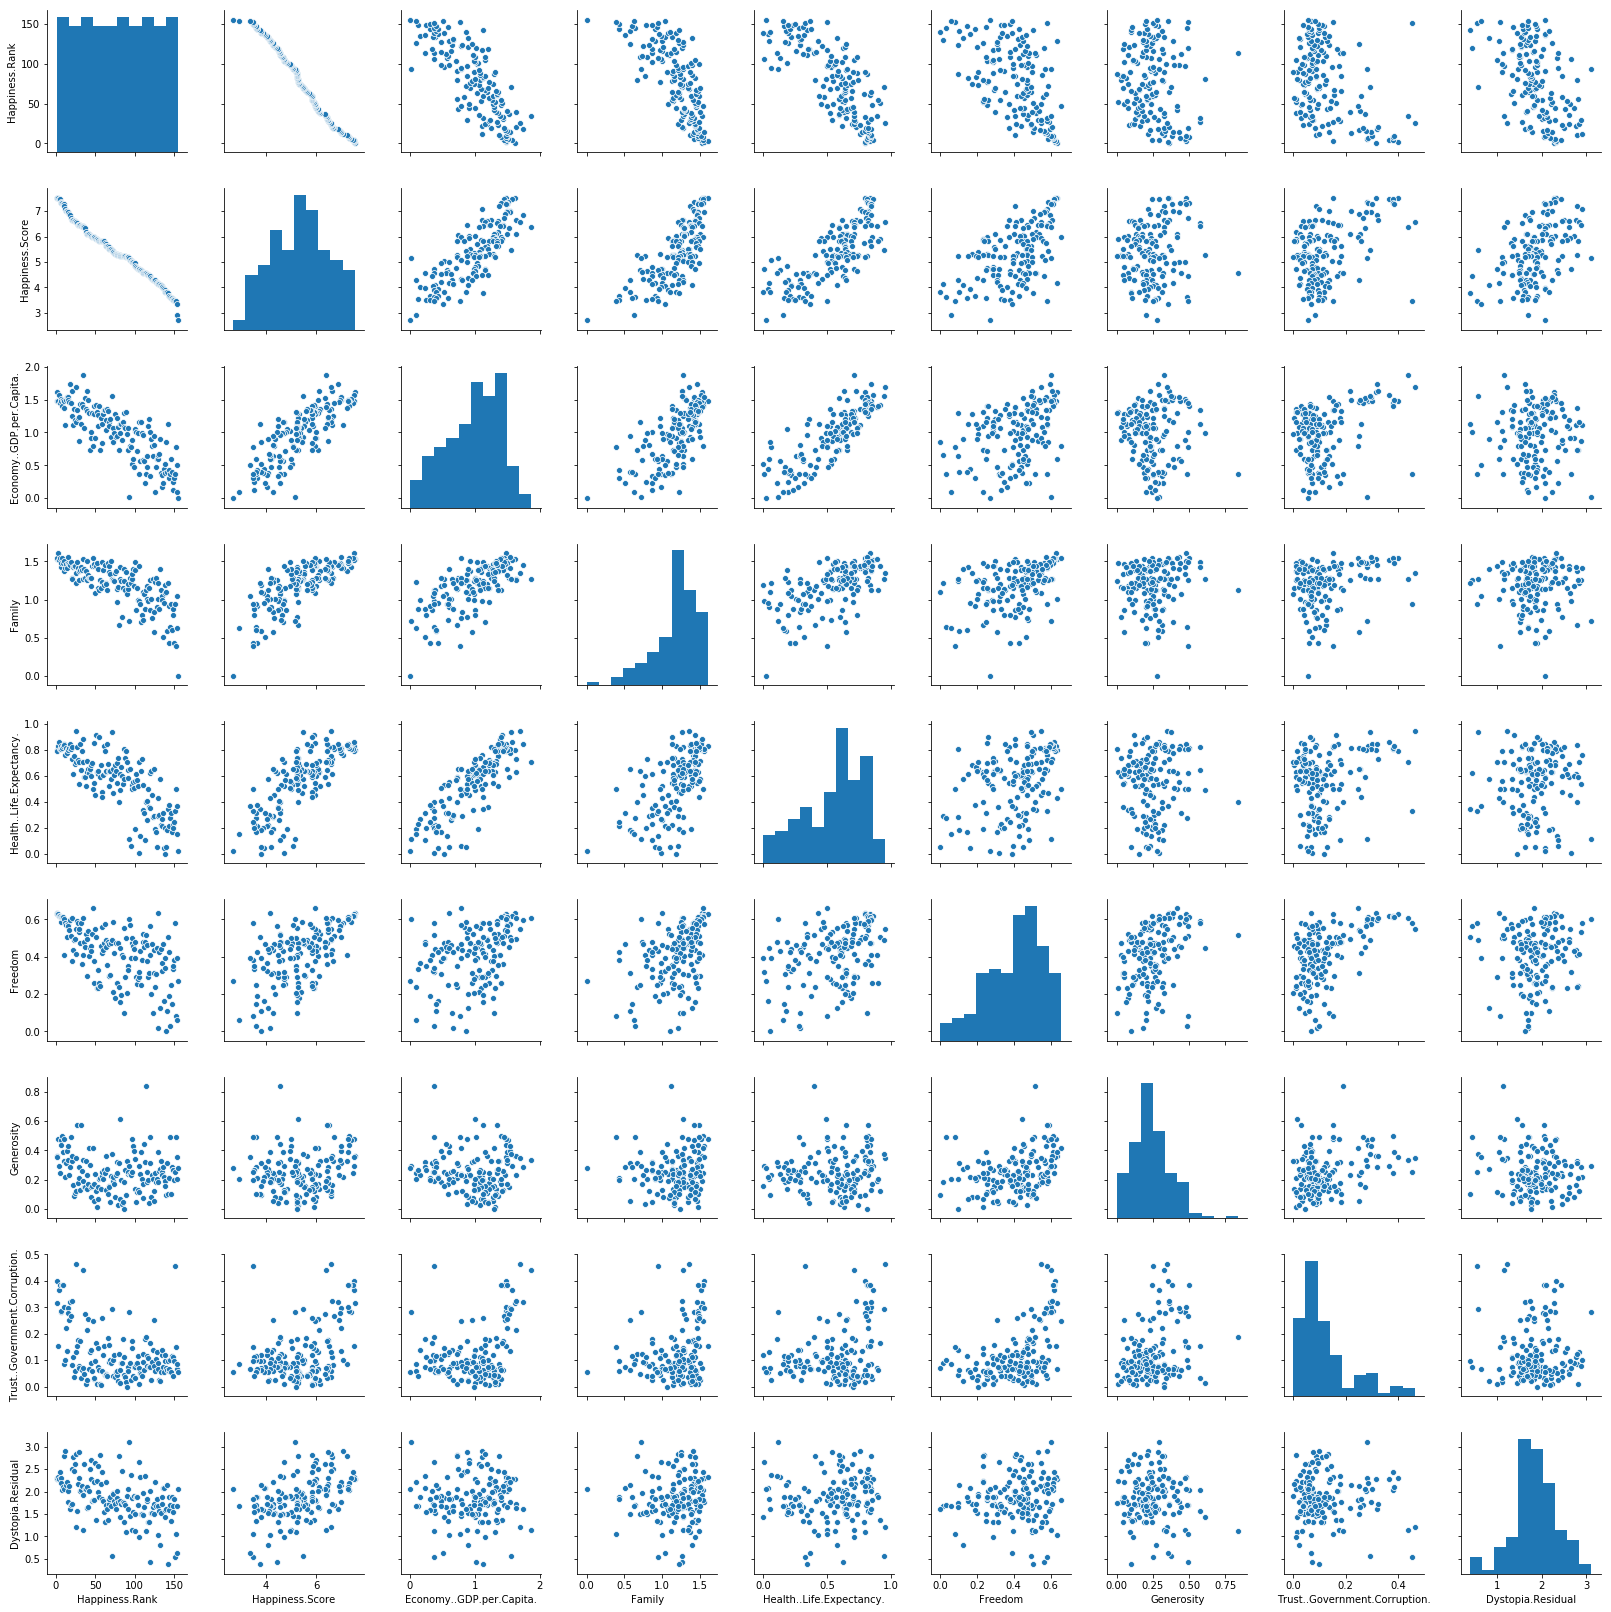

In [7]:
sns.pairplot(df2)

<h2> Dugaan korelasi terkuat terhadap Happiness Score</h2>

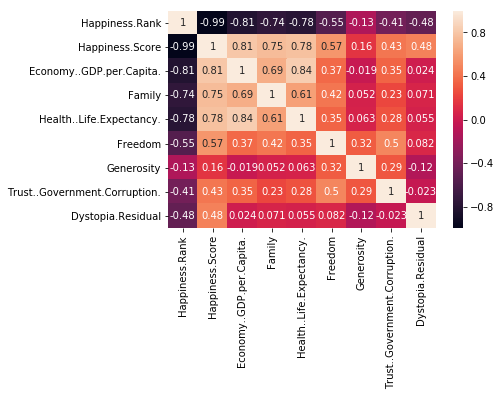

In [8]:
sns.heatmap(df2.corr(), annot=True)

<p>Setelah melihat heatmap diatas, yang memungkinkan untuk berkorelasi adalah warna cerah, karena semakin cerah akan mendekati 1, yang artinya sangat berkorelasi. Terdapat 2 korelasi yang lumayan cerah dengan tingkat korelasi 0,81 dan 0,78 yaitu</p>

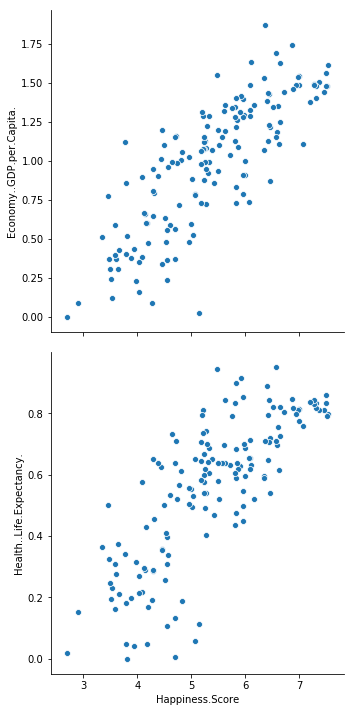

In [9]:
sns.pairplot(data=df2, height = 5,
                  x_vars=['Happiness.Score'],
                  y_vars=['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.'])


<p>Didapatkan korelasi antara Happiness Score dan masing-masing variabel lainnya. Variabel mana yang memiliki korelasi tertinggi dengan Happiness Score?</p>

In [10]:
df2.corr(method="pearson", min_periods=20)["Happiness.Score"].abs().sort_values(ascending=False)

Happiness.Score                  1.000000
Happiness.Rank                   0.992774
Economy..GDP.per.Capita.         0.812469
Health..Life.Expectancy.         0.781951
Family                           0.752737
Freedom                          0.570137
Dystopia.Residual                0.475355
Trust..Government.Corruption.    0.429080
Generosity                       0.155256
Name: Happiness.Score, dtype: float64

<h3>Kesimpulan</h3>
<p>Saya putuskan untuk menggunakan data GDP dikarenakan pada GDP memiliki korelasi yang kuat terhadap Happiness Score, dengan begitu GDP sangat berpengaruh dalam pengambilan Score(abaikan score dan rank)</p>

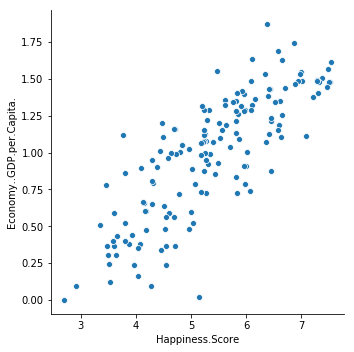

In [11]:
sns.pairplot(data=df2, height = 5,
                  x_vars=['Happiness.Score'],
                  y_vars=['Economy..GDP.per.Capita.'])


<h1>Statistik Deskriptif 2 fitur terpilih</h1>

In [12]:
mina = np.min(df2['Happiness.Score'])
maxa = np.max(df2['Happiness.Score'])
meana = np.mean(df2['Happiness.Score'])
mediana = np.median(df2['Happiness.Score'])
stda = np.std(df2['Happiness.Score'])
vara = np.var(df2['Happiness.Score'])

minb = np.min(df2['Economy..GDP.per.Capita.'])
maxb = np.max(df2['Economy..GDP.per.Capita.'])
meanb = np.mean(df2['Economy..GDP.per.Capita.'])
medianb = np.median(df2['Economy..GDP.per.Capita.'])
stdb = np.std(df2['Economy..GDP.per.Capita.'])
varb = np.var(df2['Economy..GDP.per.Capita.'])

print("Min Happiness Score :",mina, '\t\t\t\tdan Min GDP : ',minb )
print("Max Happiness Score :",maxa, '\t\t\tdan Max GDP : ',maxb)
print("Mean Happiness Score :",meana, '\t\t\tdan Mean GDP : ',meanb)
print("Median Happiness Score :",mediana, '\t\t\tdan Median GDP : ',medianb)
print("Standar Deviation Happiness Score :",stda, '\t\tdan Standar Deviation GDP : ',stdb)
print("Variance Happiness Score :",vara, '\t\t\tdan Variance GDP : ',varb)


Min Happiness Score : 2.69300007820129 				dan Min GDP :  0.0
Max Happiness Score : 7.537000179290769 			dan Max GDP :  1.8707656860351598
Mean Happiness Score : 5.354019355773926 			dan Mean GDP :  0.9847182019463474
Median Happiness Score : 5.27899980545044 			dan Median GDP :  1.06457793712616
Standar Deviation Happiness Score : 1.1275750558372233 		dan Standar Deviation GDP :  0.4194331171729727
Variance Happiness Score : 1.2714255065463171 			dan Variance GDP :  0.17592413978143667


<h1>Analisisi Model Regersi (linear/nonlinier)</h1>

In [13]:
## Analisis Model Regresi
msk = np.random.rand(len(df2)) < 0.8
train = df2[msk]
test = df2[~msk]

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Happiness.Score']])
train_y = np.asanyarray(train[['Economy..GDP.per.Capita.']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.2891801]]
Intercept:  [-0.56568496]


<h3>Regressi Linear</h3>

Text(0, 0.5, 'Health..Life.Expectancy.')

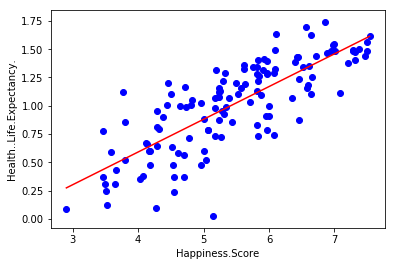

In [14]:
## Regresi Linear
plt.scatter(train[['Happiness.Score']], train[['Economy..GDP.per.Capita.']],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Happiness.Score")
plt.ylabel("Health..Life.Expectancy.")

<h3>Model Evaluasi</h3>

In [15]:
test_x = np.asanyarray(test[['Happiness.Score']])
test_y = np.asanyarray(test[['Economy..GDP.per.Capita.']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.23
Residual sum of squares (MSE): 0.07
R2-score: 0.38


<h3>Regressi NonLiniear</h3>

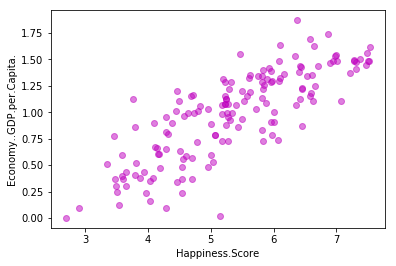

In [16]:

x_data, y_data = (df2["Happiness.Score"].values, df2["Economy..GDP.per.Capita."].values)
plt.plot(x_data, y_data, 'mo' ,alpha=0.5)
plt.xlabel('Happiness.Score')
plt.ylabel('Economy..GDP.per.Capita.')
plt.show()

In [17]:

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp (-beta_1*(x-Beta_2)) )
     return y

def expo (x, Beta_0, Beta_1):
     y = Beta_0*np.exp(Beta_1*x)
     return y

def qubic (x, Beta_0, Beta_1, Beta_2, Beta_3):
     y = Beta_0+Beta_1*x+Beta_2*x**2+Beta_3*x**3
     return y

In [18]:
beta_1 = 1.0
beta_2 = 1
beta_3= 1
beta_4=0.1

Y_preds =sigmoid (x_data, beta_1, beta_2)

In [19]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [20]:
popt1, pcov1 = curve_fit(sigmoid, xdata, ydata, maxfev = 10000)
popt2, pcov2 = curve_fit (expo, xdata, ydata, maxfev = 10000) 
popt3, pcov3 = curve_fit (qubic, xdata, ydata, maxfev = 10000) 

print(" Exponensial","B1 = %f, B2=%f"%(popt2[0], popt2[1]))
print(" Sigmoid","B1 = %f, B2=%f"%(popt1[0], popt1[1]))
print(" Qubic","B1 = %f, B2=%f"%(popt3[0], popt3[1]))

 Exponensial B1 = 0.113260, B2=2.100983
 Sigmoid B1 = 1.000000, B2=0.608128
 Qubic B1 = -0.062567, B2=-0.702809


/opt/conda/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


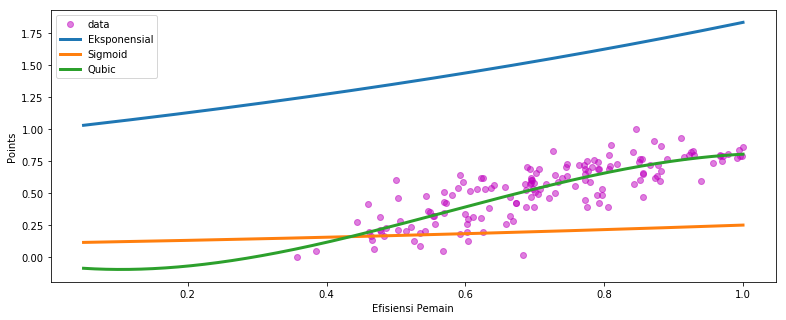

In [21]:
x = np.linspace(10, 200, 1000)
x = x/max(x)
plt.figure(figsize=(13,5))

y1 = expo(x, *popt1)
y2 = sigmoid(x, *popt2)
y3 = qubic(x, *popt3)

plt.plot(xdata, ydata, 'mo',alpha=0.5 ,label='data')
plt.plot(x,y1, linewidth=3.0, label='Eksponensial')
plt.plot(x,y2, linewidth=3.0, label='Sigmoid')
plt.plot(x,y3, linewidth=3.0, label='Qubic')
plt.legend(loc='best')
plt.xlabel('Efisiensi Pemain')
plt.ylabel('Points')
plt.show()

In [22]:
# msk = np.random.rand(len(df2)) < 0.8

train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt1, pcov1 = curve_fit(sigmoid, train_x, train_y, maxfev = 100000)
popt2, pcov2 = curve_fit(expo, train_x, train_y, maxfev = 100000)
popt3, pcov3 = curve_fit(qubic, xdata, ydata, maxfev = 10000)

y_hat1 = sigmoid(test_x, *popt1)
y_hat2 = expo(test_x, *popt2)
y_hat3 = qubic(test_x, *popt3)

print ("Sigmoid")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat1 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat1 , test_y) )

print ("\nExponens")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat2 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat2 , test_y) )

print ("\nQubic")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat3 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat3 , test_y) )

Sigmoid
Mean absolute error: 0.20
Residual sum of squares (MSE): 0.06
R2-score: -38.31

Exponens
Mean absolute error: 0.14
Residual sum of squares (MSE): 0.03
R2-score: -0.13

Qubic
Mean absolute error: 0.11
Residual sum of squares (MSE): 0.02
R2-score: 0.56


Kesimpulan : Setelah melakukan pembandingan Linier dan NonLinier, Error terkecil berada pada Regresi Non Linier milik Qubic memiliki r2Score 0.69 dibandingkan dengan yang lainnya. Prediksi dapat dilakukan menggunakan hasil B0 dan B1 dari regresi Qubic

<h1>Analisis menggunakan clustering</h1>

In [23]:
#hapus country dan happiness rank
df2 = df2.iloc[:,2:]

print("\n \n Dimenstion of dataset  : df2.shape")
df2.shape

df2.dtypes

ss = StandardScaler()
ss.fit_transform(df2)
df2.sample(20)


 
 Dimenstion of dataset  : df2.shape


,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
76,5.293,1.222556,0.967983,0.701289,0.255772,0.248003,0.043103,1.854492
138,3.808,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835
118,4.460,0.339234,0.864669,0.353410,0.408843,0.312651,0.165456,2.015744
18,6.714,1.441634,1.496460,0.805336,0.508190,0.492774,0.265428,1.704144
27,6.454,1.217560,1.412228,0.719217,0.579392,0.175097,0.178062,2.172410
94,5.074,0.783756,1.215770,0.056916,0.394953,0.230947,0.026122,2.365391
79,5.269,0.726884,0.672691,0.402048,0.235215,0.315446,0.124348,2.792489
58,5.822,1.130777,1.493149,0.437726,0.418272,0.249925,0.259270,1.832910
25,6.572,1.692278,1.353814,0.949492,0.549841,0.345966,0.464308,1.216362
60,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158


In [24]:
# Tentukan kelas CluserMethod: yang mengembalikan hasil pengelompokan berdasarkan input
class ClusterMethodList(object) :
    def get_cluster_instance(self, argument,input_data,X):
        method_name = str(argument).lower()+ '_cluster'
        method = getattr(self,method_name,lambda : "Invalid Clustering method")
        return method(input_data,X)
    
    def kmeans_cluster(self,input_data,X):
        km = cluster.KMeans(n_clusters =input_data['n_clusters'] )
        return km.fit_predict(X)
   
    def meanshift_cluster(self,input_data,X):
        ms = cluster.MeanShift(bandwidth=input_data['bandwidth'])
        return  ms.fit_predict(X)
    
    def minibatchkmeans_cluster(self,input_data,X):
        two_means = cluster.MiniBatchKMeans(n_clusters=input_data['n_clusters'])
        return two_means.fit_predict(X)
   
    def dbscan_cluster(self,input_data,X):
        db = cluster.DBSCAN(eps=input_data['eps'])
        return db.fit_predict(X)
    
    def spectral_cluster(self,input_data,X):
        sp = cluster.SpectralClustering(n_clusters=input_data['n_clusters'])
        return sp.fit_predict(X)
   
    def affinitypropagation_cluster(self,input_data,X):
        affinity_propagation =  cluster.AffinityPropagation(damping=input_data['damping'], preference=input_data['preference'])
        affinity_propagation.fit(X)
        return affinity_propagation.predict(X)
       
    
    def birch_cluster(self,input_data,X):
        birch = cluster.Birch(n_clusters=input_data['n_clusters'])
        return birch.fit_predict(X)
   
    def gaussian_mixture_cluster(self,input_data,X):
        gmm = mixture.GaussianMixture( n_components=input_data['n_clusters'], covariance_type='full')
        gmm.fit(X)
        return  gmm.predict(X)

In [25]:

# menentukan clustering process

def startClusteringProcess(list_cluster_method,input_data,no_columns,data_set):
    fig,ax = plt.subplots(no_rows,no_columns, figsize=(10,10)) 
    cluster_list = ClusterMethodList()
    i = 0
    j=0
    for cl in list_cluster_method :
        cluster_result = cluster_list.get_cluster_instance(cl,input_data,data_set)
        #convert cluster result array to DataFrame
        data_set[cl] = pd.DataFrame(cluster_result)
        ax[i,j].scatter(data_set.iloc[:, 0], data_set.iloc[:, 1],  c=cluster_result)
        ax[i,j].set_title(cl+" Cluster Result")
        j=j+1
        if( j % no_columns == 0) :
            j= 0
            i=i+1
    plt.subplots_adjust(bottom=-0.5, top=1.5)
    plt.show()

In [26]:
list_cluster_method = ['KMeans',"MeanShift","MiniBatchKmeans","DBScan","Spectral","AffinityPropagation","Birch","Gaussian_Mixture"]
# untuk menampilkan graph
no_columns = 2
no_rows = 4
# tdk smw algo make ini
n_clusters= 3
bandwidth = 0.1
# eps untuk DBSCAN
eps = 0.3
## Damping and perference untuk Affinity Propagation clustering method
damping = 0.9
preference = -200
input_data = {'n_clusters' :  n_clusters, 'eps' : eps,'bandwidth' : bandwidth, 'damping' : damping, 'preference' : preference}

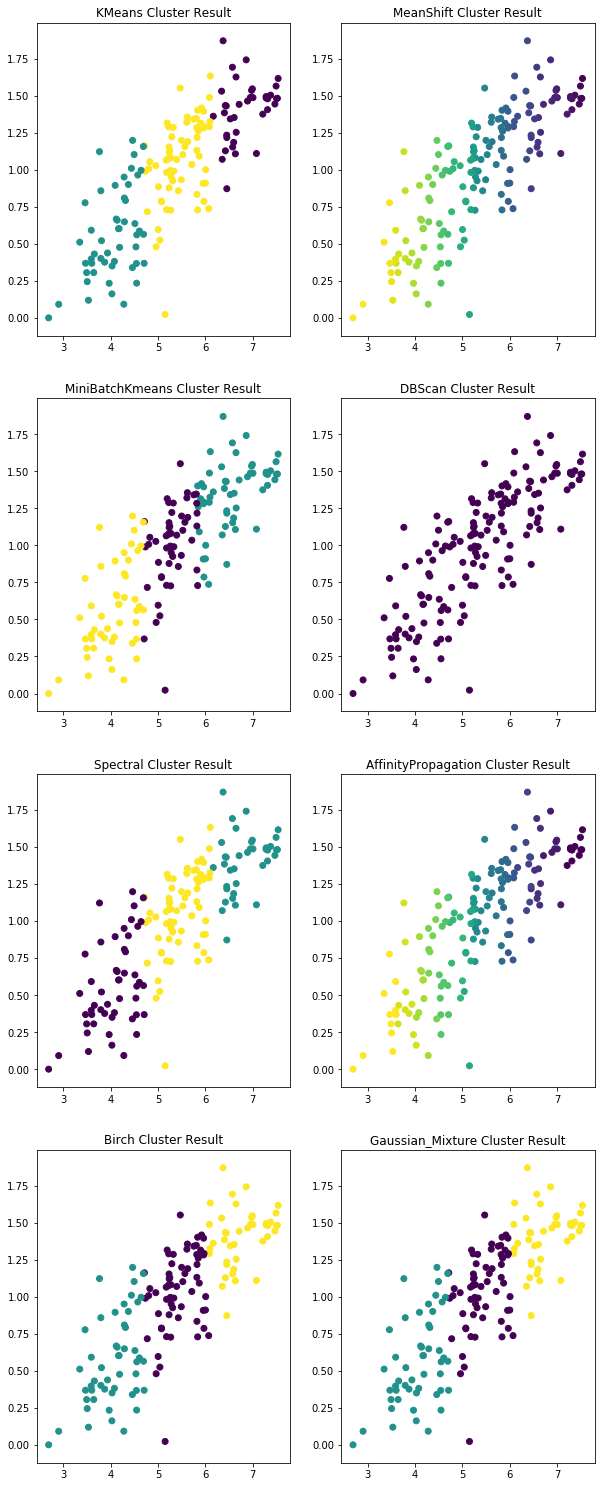

In [27]:
startClusteringProcess(list_cluster_method,input_data,no_columns,df2)